In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('tcp-connection (1).csv')

In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,b'udp',b'domain_u',b'SF',44,134,0,0,0,0,...,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'smtp',b'SF',1489,385,0,0,0,0,...,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
3,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
4,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.'


In [4]:
df.shape

(494021, 42)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [6]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serrer_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [7]:
df['intrusion'].values

array(["b'normal.'", "b'normal.'", "b'smurf.'", ..., "b'normal.'",
       "b'normal.'", "b'neptune.'"], dtype=object)

<AxesSubplot:>

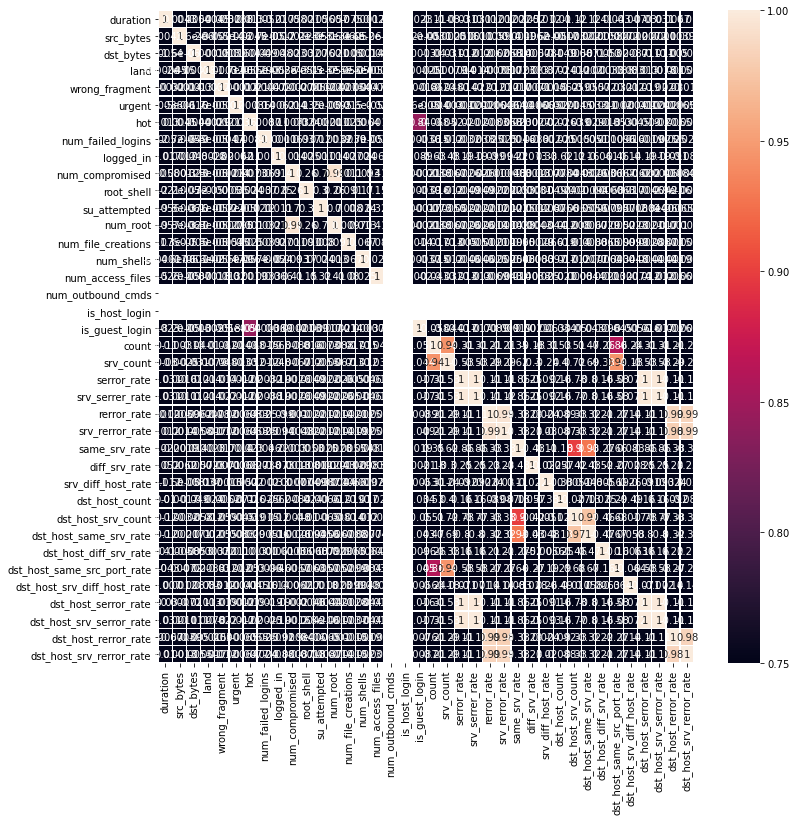

In [8]:
corrmatrix=df.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corrmatrix,vmin=.75,vmax=1,annot=True,linewidth=0.3)

In [9]:
df=df.drop(['num_outbound_cmds','srv_serrer_rate','srv_rerror_rate'],axis=1)

In [10]:
df.shape

(494021, 39)

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [19]:
le =LabelEncoder()
df['intrusion']= le.fit_transform(df['intrusion'])
df['protocol_type']=le.fit_transform(df['protocol_type'])
df['service']=le.fit_transform(df['service'])
df['flag']=le.fit_transform(df['flag'])

In [20]:
x=df.drop(['intrusion'],axis=1)
y=df['intrusion']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [22]:
from sklearn.naive_bayes import GaussianNB
cg=GaussianNB()
cg.fit(x_train,y_train)

GaussianNB()

In [24]:
y_pred=cg.predict(x_test)
y_pred

array([ 9,  9,  9, ..., 18,  9, 18], dtype=int64)

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [27]:
print('accuracy is : ',accuracy_score(y_test,y_pred))
print('precision is :',precision_score(y_test,y_pred,average='micro'))
print('recall is :',recall_score(y_test,y_pred,average='micro'))
print('f1 score is :',f1_score(y_test,y_pred,average='micro'))

accuracy is :  0.9476241080916957
precision is : 0.9476241080916957
recall is : 0.9476241080916957
f1 score is : 0.9476241080916957


In [28]:
confusion_matrix(y_pred,y_test)

array([[  428,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    0,     4,     0,     0,     0,     0,     0,     0,     0,
            0,     0,    95,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     3,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,   139,     0,     0,     2,     0,     0,     0,
            0,     0,     0,    18,     0],
       [    0,     1,     0,     9,     0,     0,     0,     0,     0,
            0,     0,   109,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,    14,     0,     0,     0,     0,     0,     0,
            2,     0,     0,     0,     0],
       [    0,     0,     0,     0,     4,   250,     4,     0,     0,

In [30]:
from sklearn.naive_bayes import BernoulliNB
cb=BernoulliNB()
cb.fit(x_train,y_train)
y_pred=cb.predict(x_test)

In [31]:
print('accuracy is : ',accuracy_score(y_test,y_pred))
print('precision is :',precision_score(y_test,y_pred,average='micro'))
print('recall is :',recall_score(y_test,y_pred,average='micro'))
print('f1 score is :',f1_score(y_test,y_pred,average='micro'))

accuracy is :  0.9915591316228936
precision is : 0.9915591316228936
recall is : 0.9915591316228936
f1 score is : 0.9915591316228936


In [32]:
confusion_matrix(y_pred,y_test)

array([[  439,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     1,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    0,     7,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     2,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     1,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    0,     0,     0,     9,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     2,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,   231,     0,     0,     0,